In [110]:
# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import talib

In [111]:


data_path = 'data/Kraken_OHLCVT'
# full_path = data_path + table
# df = pd.read_csv(full_path, header=None)
# df

In [112]:
import os

file_names = os.listdir(data_path)

btc = [f for f in file_names if "BTC" in f]
# eth = [f for f in file_names if "ETH" in f.upper()]
# sol = [f for f in file_names if "SOL" in f.upper()]

In [113]:
df = pd.read_csv(data_path + "/XBTUSDC_15.csv", header=None)
# df["timestamp"] = pd.to_datetime(df[0], unit='s') 
# X = df[[4, 'timestamp']]
# X = df[[0, 4]]
df = df.drop(columns=[6])


#above march 9 for now
df = df[df[0] >= 1710028800]
df

,0,1,2,3,4,5
125414,1710028800,68469.45,68474.69,68406.99,68406.99,0.012065
125415,1710029700,68430.30,68516.22,68430.30,68472.02,0.042177
125416,1710030600,68446.01,68616.31,68378.73,68443.42,2.228164
125417,1710031500,68499.99,68526.71,68499.99,68526.71,0.030178
125418,1710032400,68502.49,69092.70,68502.49,69092.70,1.711913
...,...,...,...,...,...,...
144259,1727736300,63611.28,63611.28,63512.15,63512.15,0.049486
144260,1727737200,63506.00,63561.87,63348.12,63561.87,0.228091
144261,1727738100,63550.58,63550.58,63349.16,63349.16,0.003137
144262,1727739000,63357.38,63357.58,62900.00,63002.95,0.624664


In [114]:
x = df.to_numpy()

# Set print options for better readability
np.set_printoptions(precision=2, suppress=True)

# Pretty print the array
print("Formatted NumPy Array:")
print(x)

Formatted NumPy Array:
[[1.71e+09 6.85e+04 6.85e+04 6.84e+04 6.84e+04 1.21e-02]
 [1.71e+09 6.84e+04 6.85e+04 6.84e+04 6.85e+04 4.22e-02]
 [1.71e+09 6.84e+04 6.86e+04 6.84e+04 6.84e+04 2.23e+00]
 ...
 [1.73e+09 6.36e+04 6.36e+04 6.33e+04 6.33e+04 3.14e-03]
 [1.73e+09 6.34e+04 6.34e+04 6.29e+04 6.30e+04 6.25e-01]
 [1.73e+09 6.30e+04 6.33e+04 6.30e+04 6.33e+04 2.89e-02]]


In [115]:
#OVERLAP STUDIES:

def calculate_bollinger_bands(data, time_period=20):
    close = data[:, 4]  # Close prices
    upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], upperband, middleband, lowerband))

def calculate_dema(data, time_period=30):
    close = data[:, 4]  # Close prices
    dema = talib.DEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dema))

def calculate_ema(data, time_period=30):
    close = data[:, 4]  # Close prices
    ema = talib.EMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], ema))

def calculate_hilbert_trendline(data):
    close = data[:, 4]  # Close prices
    h_trendline = talib.HT_TRENDLINE(close)
    return np.column_stack((data[:, 0], h_trendline))

def calculate_kamam(data, time_period=30):
    close = data[:, 4]  # Close prices
    kmam = talib.KAMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], kmam))

def calculate_midpoint(data, time_period=14):
    close = data[:, 4]  # Close prices
    midpoint = talib.MIDPOINT(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], midpoint))

def calculate_midprice(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    midprice = talib.MIDPRICE(high, low, timeperiod=time_period)
    return np.column_stack((data[:, 0], midprice))

def calculate_sar(data, acceleration=0.02, maximum=0.2):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    sar = talib.SAR(high, low, acceleration=acceleration, maximum=maximum)
    return np.column_stack((data[:, 0], sar))

def calculate_sma(data, time_period=30):
    close = data[:, 4]  # Close prices
    sma = talib.SMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], sma))

def calculate_tema(data, time_period=30):
    close = data[:, 4]  # Close prices
    tema = talib.TEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], tema))

def calculate_wma(data, time_period=30):
    close = data[:, 4]  # Close prices
    wma = talib.WMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], wma))

In [116]:
#momentum indicators:
def calculate_adx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adx = talib.ADX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adx))

def calculate_adxr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adxr = talib.ADXR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adxr))

def calculate_apO(data):
    close = data[:, 4] # Close prices
    apo = talib.APO(close)
    return np.column_stack((data[:, 0], apo))

def calculate_aroonosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    aroonosc = talib.AROONOSC(high, low)
    return np.column_stack((data[:, 0], aroonosc))

def calculate_bop(data):
    open_price = data[:, 1]  # Open prices
    high = data[:, 2]        # High prices
    low = data[:, 3]         # Low prices
    close = data[:, 4]       # Close prices
    bop = talib.BOP(open_price, high, low, close)
    return np.column_stack((data[:, 0], bop))

def calculate_cci(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    cci = talib.CCI(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cci))

def calculate_cmo(data, time_period=14):
    close = data[:, 4]  # Close prices
    cmo = talib.CMO(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cmo))

def calculate_dx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    dx = talib.DX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dx))

def calculate_macd(data):
    close = data[:, 4]  # Close prices
    macd, macdsignal, macdhist = talib.MACD(close)
    return np.column_stack((data[:, 0], macd, macdsignal, macdhist))

def calculate_minus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    minus_di = talib.MINUS_DI(high, low, close)
    return np.column_stack((data[:, 0], minus_di))

def calculate_minus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    minus_dm = talib.MINUS_DM(high, low)
    return np.column_stack((data[:, 0], minus_dm))

def calculate_momentum(data, time_period=10):
    close = data[:, 4]  # Close prices
    momentum = talib.MOM(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], momentum))

def calculate_plus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    plus_di = talib.PLUS_DI(high, low, close)
    return np.column_stack((data[:, 0], plus_di))

def calculate_plus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    plus_dm = talib.PLUS_DM(high, low)
    return np.column_stack((data[:, 0], plus_dm))

def calculate_ppo(data):
    close = data[:, 4]  # Close prices
    ppo = talib.PPO(close)
    return np.column_stack((data[:, 0], ppo))

def calculate_roc(data, time_period=10):
    close = data[:, 4]  # Close prices
    roc = talib.ROC(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], roc))

def calculate_rocp(data):
    close = data[:, 4]  # Close prices
    rocp = talib.ROCP(close)
    return np.column_stack((data[:, 0], rocp))

def calculate_rocr(data):
    close = data[:, 4]  # Close prices
    rocr = talib.ROCR(close)
    return np.column_stack((data[:, 0], rocr))

def calculate_rocr100(data):
    close = data[:, 4]  # Close prices
    rocr100 = talib.ROCR100(close)
    return np.column_stack((data[:, 0], rocr100))

def calculate_rsi(data, time_period=14):
    close = data[:, 4]  # Close prices
    rsi = talib.RSI(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], rsi))

def calculate_stochastic(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    slowk, slowd = talib.STOCHF(high, low, close)
    return np.column_stack((data[:, 0], slowk, slowd))

def calculate_trix(data):
    close = data[:, 4]  # Close prices
    trix = talib.TRIX(close)
    return np.column_stack((data[:, 0], trix))

def calculate_ultosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    ultosc = talib.ULTOSC(high, low, close)
    return np.column_stack((data[:, 0], ultosc))

def calculate_willr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    willr = talib.WILLR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], willr))

In [117]:
#volatility indicators:

def calculate_atr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    atr = talib.ATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], atr))

def calculate_natr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    natr = talib.NATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], natr))

def calculate_trange(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    prev_close = np.roll(data[:, 4], 1)  # Previous close prices (shifted)
    prev_close[0] = low[0]  # Handle the first element
    true_range = np.maximum(high - low, np.maximum(np.abs(high - prev_close), np.abs(low - prev_close)))
    return np.column_stack((data[:, 0], true_range))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# atr_result = calculate_atr(data)
# natr_result = calculate_natr(data)
# trange_result = calculate_trange(data)


In [118]:
# PATTERN RECOGNITION:
import numpy as np
# import talib

def calculate_two_crows(data):
    two_crows = talib.CDL2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], two_crows))

def calculate_three_black_crows(data):
    three_black_crows = talib.CDL3BLACKCROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_black_crows))

def calculate_three_inside(data):
    three_inside = talib.CDL3INSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_inside))

def calculate_three_line_strike(data):
    three_line_strike = talib.CDL3LINESTRIKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_line_strike))

def calculate_three_outside(data):
    three_outside = talib.CDL3OUTSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_outside))

def calculate_three_stars_in_south(data):
    three_stars_in_south = talib.CDL3STARSINSOUTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_stars_in_south))

def calculate_three_advancing_white(data):
    three_advancing_white = talib.CDL3WHITESOLDIERS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_advancing_white))

def calculate_abandoned_baby(data):
    abandoned_baby = talib.DLABANDONEDBABY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], abandoned_baby))

def calculate_advance_block(data):
    advance_block = talib.CDLADVANCEBLOCK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], advance_block))

def calculate_belt_hold(data):
    belt_hold = talib.CDLBELTHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], belt_hold))

def calculate_breakaway(data):
    breakaway = talib.CDLBREAKAWAY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], breakaway))

def calculate_closing_marubozu(data):
    closing_marubozu = talib.CDLCLOSINGMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], closing_marubozu))

def calculate_concealing_baby_swallow(data):
    concealing_baby_swallow = talib.DLCONCEALBABYSWALL(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], concealing_baby_swallow))

def calculate_counterattack(data):
    counterattack = talib.CDLCOUNTERATTACK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], counterattack))

def calculate_dark_cloud_cover(data):
    dark_cloud_cover = talib.CLDARKCLOUDCOVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dark_cloud_cover))

def calculate_doji(data):
    doji = talib.DLDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji))

def calculate_doji_star(data):
    doji_star = talib.CDLDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji_star))

def calculate_dragonfly_doji(data):
    dragonfly_doji = talib.DLDRAGONFLYDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dragonfly_doji))

def calculate_engulfing(data):
    engulfing = talib.DLENGULFING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], engulfing))

def calculate_evening_doji_star(data):
    evening_doji_star = talib.CDLEVENINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_doji_star))

def calculate_evening_star(data):
    evening_star = talib.CDLEVENINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_star))

def calculate_up_down_gap_side(data):
    up_down_gap_side = talib.CDLGAPSIDESIDEWHITE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], up_down_gap_side))

def calculate_gravestone_doji(data):
    gravestone_doji = talib.CDLGRAVESTONEDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], gravestone_doji))

def calculate_hammer(data):
    hammer = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hammer))

def calculate_hanging_man(data):
    hanging_man = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hanging_man))

def calculate_harami(data):
    harami = talib.CDLHARAMI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami))

def calculate_harami_cross(data):
    harami_cross = talib.DLHARAMICROSS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami_cross))

def calculate_high_wave(data):
    high_wave = talib.CDLHIGHWAVE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], high_wave))

def calculate_hikkake(data):
    hikkake = talib.CDLHIKKAKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hikkake))

def calculate_modified_hikkake(data):
    modified_hikkake = talib.CDLHIKKAKEMOD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], modified_hikkake))

def calculate_homing_pigeon(data):
    homing_pigeon = talib.CDLHOMINGPIGEON(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], homing_pigeon))

def calculate_identical_three_crows(data):
    identical_three_crows = talib.CDLIDENTICAL3CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], identical_three_crows))

def calculate_in_neck(data):
    in_neck = talib.CDLINNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], in_neck))

def calculate_inverted_hammer(data):
    inverted_hammer = talib.DLINVERTEDHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], inverted_hammer))

def calculate_kicking(data):
    kicking = talib.DLKICKING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking))

def calculate_kicking_by_length(data):
    kicking_by_length = talib.CDLKICKINGBYLENGTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking_by_length))

def calculate_ladder_bottom(data):
    ladder_bottom = talib.CDLLADDERBOTTOM(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], ladder_bottom))

def calculate_long_legged_doji(data):
    long_legged_doji = talib.CDLLONGLEGGEDDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_legged_doji))

def calculate_long_line(data):
    long_line = talib.CDLLONGLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_line))

def calculate_marubozu(data):
    marubozu = talib.CDLMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], marubozu))

def calculate_matching_low(data):
    matching_low = talib.CDLMATCHINGLOW(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], matching_low))

def calculate_mat_hold(data):
    mat_hold = talib.CDLMATHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], mat_hold))

def calculate_morning_doji_star(data):
    morning_doji_star = talib.CDLMORNINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_doji_star))

def calculate_morning_star(data):
    morning_star = talib.CDLMORNINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_star))

def calculate_on_neck(data):
    on_neck = talib.CDLONNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], on_neck))

def calculate_piercing(data):
    piercing = talib.CDLPIERCING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], piercing))

def calculate_rickshaw_man(data):
    rickshaw_man = talib.DLRICKSHAWMAN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rickshaw_man))

def calculate_rising_falling_three_methods(data):
    rising_falling_three_methods = talib.CDLRISEFALL3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rising_falling_three_methods))

def calculate_separating_lines(data):
    separating_lines = talib.CDLSEPARATINGLINES(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], separating_lines))

def calculate_shooting_star(data):
    shooting_star = talib.CDLSHOOTINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], shooting_star))

def calculate_short_line(data):
    short_line = talib.CDLSHORTLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], short_line))

def calculate_spinning_top(data):
    spinning_top = talib.CDLSPINNINGTOP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], spinning_top))

def calculate_stalled_pattern(data):
    stalled_pattern = talib.CDLSTALLEDPATTERN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stalled_pattern))

def calculate_stick_sandwich(data):
    stick_sandwich = talib.CDLSTICKSANDWICH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stick_sandwich))

def calculate_takuri(data):
    takuri = talib.CDLTAKURI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], takuri))

def calculate_tasuki_gap(data):
    tasuki_gap = talib.CDLTASUKIGAP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tasuki_gap))

def calculate_thrusting(data):
    thrusting = talib.CDLTHRUSTING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], thrusting))

def calculate_tristar(data):
    tristar = talib.DLTRISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tristar))

def calculate_unique_three_river(data):
    unique_three_river = talib.CDLUNIQUE3RIVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], unique_three_river))

def calculate_upside_gap_two_crows(data):
    upside_gap_two_crows = talib.CDLUPSIDEGAP2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_gap_two_crows))

def calculate_upside_downside_gap_three_methods(data):
    upside_downside_gap_three_methods = talib.CDLXSIDEGAP3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_downside_gap_three_methods))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# two_crows_result = calculate_two_crows(data)
# three_black_crows_result = calculate_three_black_crows(data)


In [119]:
#CYCLE INDICATORS:
import numpy as np


def calculate_hilbert_transform_dominant_cycle_period(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Period.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle period.
    """
    dcp = talib.HT_DCPERIOD(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dcp))

def calculate_hilbert_transform_dominant_cycle_phase(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Phase.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle phase.
    """
    dph = talib.HT_DCPHASE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dph))

def calculate_hilbert_transform_trend_mode(data):
    """
    Calculates the Hilbert Transform - Trend vs Cycle Mode.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated trend mode.
    """
    trend_mode = talib.HT_TRENDMODE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], trend_mode))


In [120]:

functions = [name for name, obj in globals().items() if callable(obj)]
technicals = [f for f in functions if "calculate" in f]

for t in technicals:
    name = ''.join(t.split("_")[1:])

    print(f'{name} = {t}(x)')



bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
na

In [121]:
bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
natr = calculate_natr(x)
trange = calculate_trange(x)
twocrows = calculate_two_crows(x)
threeblackcrows = calculate_three_black_crows(x)
threeinside = calculate_three_inside(x)
threelinestrike = calculate_three_line_strike(x)
threeoutside = calculate_three_outside(x)
threestarsinsouth = calculate_three_stars_in_south(x)
threeadvancingwhite = calculate_three_advancing_white(x)
# abandonedbaby = calculate_abandoned_baby(x)
advanceblock = calculate_advance_block(x)
belthold = calculate_belt_hold(x)
breakaway = calculate_breakaway(x)
closingmarubozu = calculate_closing_marubozu(x)
# concealingbabyswallow = calculate_concealing_baby_swallow(x)
counterattack = calculate_counterattack(x)
# darkcloudcover = calculate_dark_cloud_cover(x)
# doji = calculate_doji(x)
dojistar = calculate_doji_star(x)
# dragonflydoji = calculate_dragonfly_doji(x)
# engulfing = calculate_engulfing(x)
eveningdojistar = calculate_evening_doji_star(x)
eveningstar = calculate_evening_star(x)
updowngapside = calculate_up_down_gap_side(x)
gravestonedoji = calculate_gravestone_doji(x)
hammer = calculate_hammer(x)
hangingman = calculate_hanging_man(x)
harami = calculate_harami(x)
# haramicross = calculate_harami_cross(x)
highwave = calculate_high_wave(x)
hikkake = calculate_hikkake(x)
modifiedhikkake = calculate_modified_hikkake(x)
homingpigeon = calculate_homing_pigeon(x)
identicalthreecrows = calculate_identical_three_crows(x)
inneck = calculate_in_neck(x)
# invertedhammer = calculate_inverted_hammer(x)
# kicking = calculate_kicking(x)
kickingbylength = calculate_kicking_by_length(x)
ladderbottom = calculate_ladder_bottom(x)
longleggeddoji = calculate_long_legged_doji(x)
longline = calculate_long_line(x)
marubozu = calculate_marubozu(x)
matchinglow = calculate_matching_low(x)
mathold = calculate_mat_hold(x)
morningdojistar = calculate_morning_doji_star(x)
morningstar = calculate_morning_star(x)
onneck = calculate_on_neck(x)
piercing = calculate_piercing(x)
# rickshawman = calculate_rickshaw_man(x)
risingfallingthreemethods = calculate_rising_falling_three_methods(x)
separatinglines = calculate_separating_lines(x)
shootingstar = calculate_shooting_star(x)
shortline = calculate_short_line(x)
spinningtop = calculate_spinning_top(x)
stalledpattern = calculate_stalled_pattern(x)
sticksandwich = calculate_stick_sandwich(x)
takuri = calculate_takuri(x)
tasukigap = calculate_tasuki_gap(x)
thrusting = calculate_thrusting(x)
# tristar = calculate_tristar(x)
uniquethreeriver = calculate_unique_three_river(x)
upsidegaptwocrows = calculate_upside_gap_two_crows(x)
upsidedownsidegapthreemethods = calculate_upside_downside_gap_three_methods(x)
hilberttransformdominantcycleperiod = calculate_hilbert_transform_dominant_cycle_period(x)
hilberttransformdominantcyclephase = calculate_hilbert_transform_dominant_cycle_phase(x)
hilberttransformtrendmode = calculate_hilbert_transform_trend_mode(x)


In [122]:
import numpy as np
import pandas as pd

# Assuming x is your initial data array and you've computed your indicators as shown.
# Example: bollingerbands, dema, ema, etc. are already calculated numpy arrays.

# Create a dictionary to hold the dataframes
dfs = {
    "bollingerbands": calculate_bollinger_bands(x),
    "dema": calculate_dema(x),
    "ema": calculate_ema(x),
    "hilberttrendline": calculate_hilbert_trendline(x),
    "kamam": calculate_kamam(x),
    "midpoint": calculate_midpoint(x),
    "midprice": calculate_midprice(x),
    "sar": calculate_sar(x),
    "sma": calculate_sma(x),
    "tema": calculate_tema(x),
    "wma": calculate_wma(x),
    "adx": calculate_adx(x),
    "adxr": calculate_adxr(x),
    "apo": calculate_apO(x),
    "aroonosc": calculate_aroonosc(x),
    "bop": calculate_bop(x),
    "cci": calculate_cci(x),
    "cmo": calculate_cmo(x),
    "dx": calculate_dx(x),
    "macd": calculate_macd(x),
    "minusdi": calculate_minus_di(x),
    "minusdm": calculate_minus_dm(x),
    "momentum": calculate_momentum(x),
    "plusdi": calculate_plus_di(x),
    "plusdm": calculate_plus_dm(x),
    "ppo": calculate_ppo(x),
    "roc": calculate_roc(x),
    "rocp": calculate_rocp(x),
    "rocr": calculate_rocr(x),
    "rocr100": calculate_rocr100(x),
    "rsi": calculate_rsi(x),
    "stochastic": calculate_stochastic(x),
    "trix": calculate_trix(x),
    "ultosc": calculate_ultosc(x),
    "willr": calculate_willr(x),
    "atr": calculate_atr(x),
    "natr": calculate_natr(x),
    "trange": calculate_trange(x),
    "twocrows": calculate_two_crows(x),
    "threeblackcrows": calculate_three_black_crows(x),
    "threeinside": calculate_three_inside(x),
    "threelinestrike": calculate_three_line_strike(x),
    "threeoutside": calculate_three_outside(x),
    "threestarsinsouth": calculate_three_stars_in_south(x),
    "threeadvancingwhite": calculate_three_advancing_white(x),
    "advanceblock": calculate_advance_block(x),
    "belthold": calculate_belt_hold(x),
    "breakaway": calculate_breakaway(x),
    "closingmarubozu": calculate_closing_marubozu(x),
    "counterattack": calculate_counterattack(x),
    "dojistar": calculate_doji_star(x),
    "eveningdojistar": calculate_evening_doji_star(x),
    "eveningstar": calculate_evening_star(x),
    "updowngapside": calculate_up_down_gap_side(x),
    "gravestonedoji": calculate_gravestone_doji(x),
    "hammer": calculate_hammer(x),
    "hangingman": calculate_hanging_man(x),
    "harami": calculate_harami(x),
    "kickingbylength": calculate_kicking_by_length(x),
    "ladderbottom": calculate_ladder_bottom(x),
    "longleggeddoji": calculate_long_legged_doji(x),
    "longline": calculate_long_line(x),
    "marubozu": calculate_marubozu(x),
    "matchinglow": calculate_matching_low(x),
    "mathold": calculate_mat_hold(x),
    "morningdojistar": calculate_morning_doji_star(x),
    "morningstar": calculate_morning_star(x),
    "onneck": calculate_on_neck(x),
    "piercing": calculate_piercing(x),
    "risingfallingthreemethods": calculate_rising_falling_three_methods(x),
    "separatinglines": calculate_separating_lines(x),
    "shootingstar": calculate_shooting_star(x),
    "shortline": calculate_short_line(x),
    "spinningtop": calculate_spinning_top(x),
    "stalledpattern": calculate_stalled_pattern(x),
    "sticksandwich": calculate_stick_sandwich(x),
    "takuri": calculate_takuri(x),
    "tasukigap": calculate_tasuki_gap(x),
    "thrusting": calculate_thrusting(x),
    "uniquethreeriver": calculate_unique_three_river(x),
    "upsidegaptwocrows": calculate_upside_gap_two_crows(x),
    "upsidedownsidegapthreemethods": calculate_upside_downside_gap_three_methods(x),
    "hilberttransformdominantcycleperiod": calculate_hilbert_transform_dominant_cycle_period(x),
    "hilberttransformdominantcyclephase": calculate_hilbert_transform_dominant_cycle_phase(x),
    "hilberttransformtrendmode": calculate_hilbert_transform_trend_mode(x)
}

# Start with the first DataFrame (assuming the first calculated indicator has data)
merged_df = pd.DataFrame(dfs["bollingerbands"])

# Merge each DataFrame on the timestamp
for key, value in dfs.items():
    if key != "bollingerbands":  # Skip the first since it's already merged
        temp_df = pd.DataFrame(value)
        
        # Rename columns to avoid conflicts
        temp_df.columns = [f"{key}_{col}" if col != temp_df.columns[0] else col for col in temp_df.columns]
        
        # Merge on the timestamp
        merged_df = pd.merge(merged_df, temp_df, on=merged_df.columns[0], how='outer')

# Optionally sort by timestamp
merged_df.sort_values(by=merged_df.columns[0], inplace=True)

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)

# Display the final merged DataFrame
# print(merged_df)


In [123]:
merged_df['timestamp'] = merged_df[0]

In [124]:
# Create DataFrame with specified column names
prices = pd.DataFrame(x, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# prices


In [125]:
df = pd.merge(prices, merged_df, on='timestamp', how='inner', suffixes=('_price', '_indicator'))

# df

In [126]:
df['returns'] = df['close'].pct_change()  # or df['close'].diff() / df['close'].shift(1)

In [127]:
df['next_returns'] = df['returns'].shift(-1)
df = df.iloc[:-1]
df

,timestamp,open,high,low,close,volume,0,1,2,3,...,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1,returns,next_returns
0,1.710029e+09,68469.45,68474.69,68406.99,68406.99,0.012065,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.000951
1,1.710030e+09,68430.30,68516.22,68430.30,68472.02,0.042177,1.710030e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.000951,-0.000418
2,1.710031e+09,68446.01,68616.31,68378.73,68443.42,2.228164,1.710031e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,-0.000418,0.001217
3,1.710032e+09,68499.99,68526.71,68499.99,68526.71,0.030178,1.710032e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.001217,0.008259
4,1.710032e+09,68502.49,69092.70,68502.49,69092.70,1.711913,1.710032e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.008259,-0.001836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18844,1.727735e+09,63615.00,63615.00,63615.00,63615.00,0.000100,1.727735e+09,63902.543840,63560.1695,63217.795160,...,0.0,0.0,0.0,0.0,0.0,25.553290,131.637603,0.0,-0.000190,-0.001617
18845,1.727736e+09,63611.28,63611.28,63512.15,63512.15,0.049486,1.727736e+09,63894.673405,63553.7530,63212.832595,...,0.0,0.0,0.0,0.0,0.0,24.476754,161.473345,0.0,-0.001617,0.000783
18846,1.727737e+09,63506.00,63561.87,63348.12,63561.87,0.228091,1.727737e+09,63891.244096,63551.3000,63211.355904,...,0.0,0.0,0.0,0.0,0.0,23.569387,176.492954,0.0,0.000783,-0.003347
18847,1.727738e+09,63550.58,63550.58,63349.16,63349.16,0.003137,1.727738e+09,63893.004240,63549.8140,63206.623760,...,0.0,0.0,0.0,0.0,0.0,22.909236,197.905015,0.0,-0.003347,-0.005465


In [128]:
data = df.drop(columns = ['open', 'high', 'low', 'close', 'volume', 0, 1, 2, 3])
data.dropna(how='any', inplace=True)
X = data.drop(columns = ['returns', 'next_returns'])
y = data[['timestamp', 'next_returns']]
X.head()

,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,tema_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
88,1.710109e+09,69285.210408,69390.713379,69445.053482,69558.184017,69204.20,69162.465,69704.776205,69423.885333,69194.298777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.359648,-9.242758,0.0
89,1.710110e+09,69205.857628,69346.197677,69410.586899,69501.276052,69124.75,69142.825,69608.298584,69400.427333,69088.221739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.055650,-24.436744,0.0
90,1.710111e+09,69114.841355,69294.494601,69362.976148,69433.094035,69046.79,68937.045,69499.389154,69375.254000,68968.018017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.715962,-35.498463,0.0
91,1.710112e+09,69060.732249,69260.549788,69315.731193,69399.601492,69046.79,68937.045,69329.957073,69354.258333,68904.518013,...,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,16.603474,-34.817790,1.0
92,1.710112e+09,69016.126123,69230.842705,69266.896829,69371.125596,69046.79,68937.045,69184.245482,69333.945000,68856.052411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.947380,-30.670495,1.0


In [129]:
X.reset_index(inplace=True)
X.drop(columns=['index'], inplace=True)

In [130]:
y.reset_index(inplace=True)
y.drop(columns=['index'], inplace=True)


In [131]:

from sklearn.preprocessing import StandardScaler

timestamps = X['timestamp'].values  # Extract timestamp
features = X.drop(columns=['timestamp'])

# Step 2: Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Combine the scaled features with the timestamp
scaled_df = pd.DataFrame(scaled_features)
# scaled_df['timestamp'] = timestamps  # Add the timestamp back

# Display the result
# print(scaled_df)


In [132]:

# scaled_df['timestamp'] = X['timestamp']
# scaled_df

In [133]:
X

,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,tema_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
0,1.710109e+09,69285.210408,69390.713379,69445.053482,69558.184017,69204.200,69162.465,69704.776205,69423.885333,69194.298777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.359648,-9.242758,0.0
1,1.710110e+09,69205.857628,69346.197677,69410.586899,69501.276052,69124.750,69142.825,69608.298584,69400.427333,69088.221739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.055650,-24.436744,0.0
2,1.710111e+09,69114.841355,69294.494601,69362.976148,69433.094035,69046.790,68937.045,69499.389154,69375.254000,68968.018017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.715962,-35.498463,0.0
3,1.710112e+09,69060.732249,69260.549788,69315.731193,69399.601492,69046.790,68937.045,69329.957073,69354.258333,68904.518013,...,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,16.603474,-34.817790,1.0
4,1.710112e+09,69016.126123,69230.842705,69266.896829,69371.125596,69046.790,68937.045,69184.245482,69333.945000,68856.052411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.947380,-30.670495,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18756,1.727735e+09,63537.360675,63652.795809,63565.215021,63798.276425,63593.080,63546.285,63513.609639,63581.724333,63661.699189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.553290,131.637603,0.0
18757,1.727736e+09,63527.245671,63643.721886,63555.281087,63793.114074,63625.585,63596.265,63821.160000,63572.158667,63642.588431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.476754,161.473345,0.0
18758,1.727737e+09,63524.539427,63638.441119,63551.282821,63787.968097,63625.585,63584.640,63814.979800,63560.808333,63634.849142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.569387,176.492954,0.0
18759,1.727738e+09,63495.765411,63619.777821,63549.600416,63777.064460,63585.160,63584.640,63796.305408,63548.116667,63589.499957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.909236,197.905015,0.0


In [134]:
# if y['timestamp'] == X['timestamp']:
scaled_df = pd.concat([y['next_returns'], scaled_df], axis=1)
scaled_df = pd.concat([X['timestamp'], scaled_df], axis=1)
# else:
#     raise 

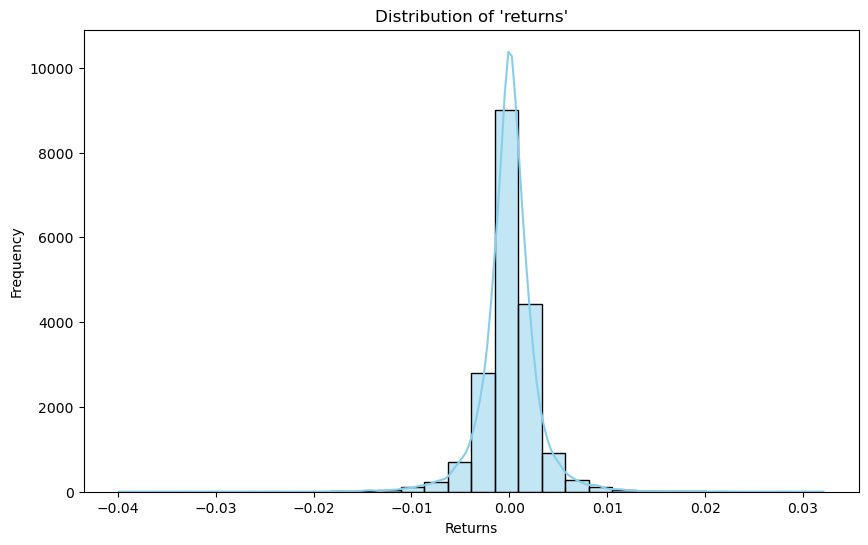

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(scaled_df['next_returns'], kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [136]:
# Use qcut to divide 'returns' into 11 equal-sized groups and label them from 1 to 11
scaled_df['return_group'] = pd.qcut(scaled_df['next_returns'], q=11, labels=range(1, 11 + 1))

# Display the DataFrame with the new 'return_group' column
scaled_df.groupby('return_group').size()

return_group
1     1706
2     1705
3     1706
4     1705
5     1706
6     1705
7     1706
8     1705
9     1706
10    1705
11    1706
dtype: int64

In [137]:
scaled_df.head()

,timestamp,next_returns,0,1,2,3,4,5,6,7,...,78,79,80,81,82,83,84,85,86,return_group
0,1.710109e+09,-0.002308,1.236597,1.270276,1.279284,1.297089,1.225076,1.219172,1.336087,1.275134,...,-0.163248,0.018189,0.107416,-0.026333,0.012646,-0.003955,-0.835386,-1.316646,-0.870139,2
1,1.710110e+09,-0.002270,1.218591,1.260089,1.271414,1.284173,1.206968,1.214694,1.314227,1.269778,...,-0.163248,0.018189,0.107416,-0.026333,0.012646,-0.003955,-0.896271,-1.466824,-0.870139,2
2,1.710111e+09,0.003261,1.197939,1.248257,1.260542,1.268697,1.189199,1.167777,1.289549,1.264029,...,-0.163248,0.018189,0.107416,-0.026333,0.012646,-0.003955,-0.964305,-1.576159,-0.870139,11
3,1.710112e+09,0.000462,1.185661,1.240489,1.249753,1.261096,1.189199,1.167777,1.251157,1.259235,...,-0.163248,0.018189,0.107416,-0.026333,0.012646,-10.603156,-0.986834,-1.569431,1.149242,7
4,1.710112e+09,0.000294,1.175539,1.233691,1.238602,1.254632,1.189199,1.167777,1.218140,1.254596,...,-0.163248,0.018189,0.107416,-0.026333,0.012646,-0.003955,-0.917956,-1.528439,1.149242,7


In [138]:
from sklearn.model_selection import train_test_split

train_size = 0.8  # 80% for training and 20% for testing

split_index = int(len(scaled_df) * train_size)

train_df = scaled_df[:split_index]
test_df = scaled_df[split_index:]

X_train = train_df.drop(columns=['next_returns', 'return_group']).to_numpy()
y_train = train_df[['timestamp','return_group']].to_numpy()

X_test = test_df.drop(columns=['next_returns', 'return_group']).to_numpy()
y_test = test_df[['timestamp','return_group']].to_numpy()

In [139]:
# # Set print options for better readability
# np.set_printoptions(precision=2, suppress=True)

# # Pretty print the array
# print("Formatted NumPy Array:")
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

In [140]:
features.shape
# target.shape

(18761, 87)

In [141]:
# from sklearn.tree import DecisionTreeClassifier


# clf = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Use 'entropy' for cross-entropy as impurity
# clf.fit(X_train[:, 1:], y_train[:, 1])

# # Verify model training
# print("Model trained successfully!")
# print("Number of features:", clf.n_features_in_)
# print("Tree depth:", clf.get_depth())
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# Now fit the model using the shifted features and target
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train[:, 1:], y_train[:, 1:])  # Fit the model on the new data

# Verify model training
print("Model trained successfully!")
print("Number of features:", clf.n_features_in_)
print("Tree depth:", clf.get_depth())


Model trained successfully!
Number of features: 87
Tree depth: 36


In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = clf.predict(X_test[:, 1:])


# Calculate accuracy
accuracy = accuracy_score(y_test[:, 1], y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test[:, 1], y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test[:, 1], y_pred)
# print("Classification Report:\n", class_report)

In [143]:
y_pred = np.column_stack((y_test[:, 0], y_pred))

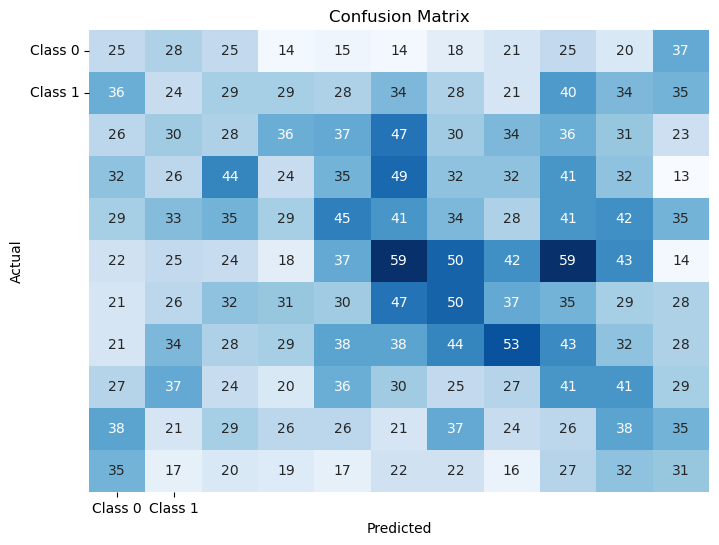

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


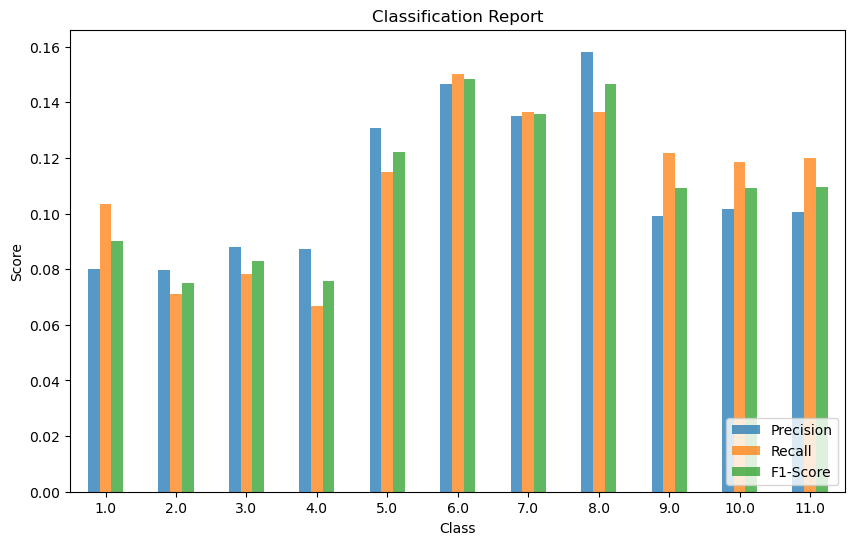

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test[:, 1], y_pred[:, 1], output_dict=True)

# Extract precision, recall, f1-score for each class
class_labels = [key for key in class_report.keys() if key not in ('accuracy', 'macro avg', 'weighted avg')]  # Get only class labels
precision = [class_report[label]['precision'] for label in class_labels]
recall = [class_report[label]['recall'] for label in class_labels]
f1 = [class_report[label]['f1-score'] for label in class_labels]

# Create a DataFrame for the classification report
class_report_df = pd.DataFrame({
    'Class': class_labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Set the class as index
class_report_df.set_index('Class', inplace=True)

# Plot the classification report
plt.figure(figsize=(10, 6))
class_report_df.plot(kind='bar', alpha=0.75, ax=plt.gca())
plt.title("Classification Report")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


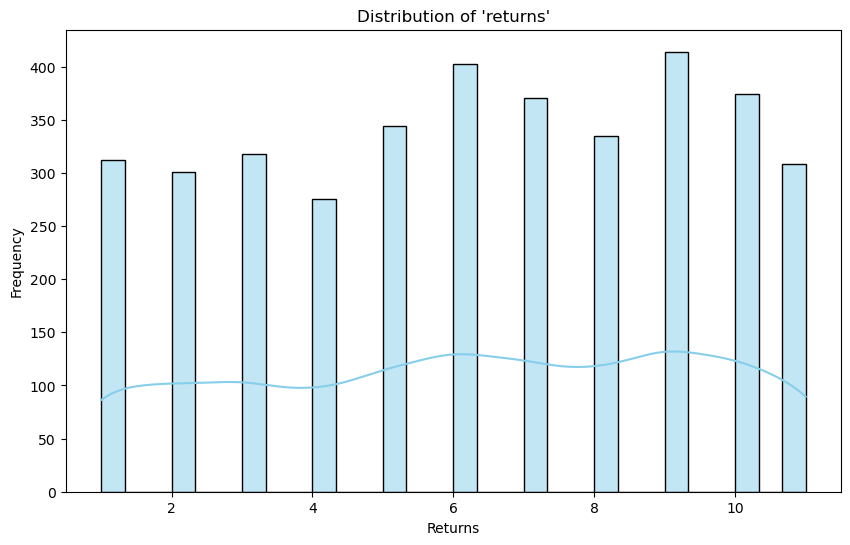

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(y_pred[:, 1], kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [147]:
u = pd.DataFrame((y_pred[:, 1] == y_test[:, 1]))
acc = u.value_counts().loc[True][0] / (u.value_counts().loc[True][0] + u.value_counts().loc[False][0])
print(f"correct group prediction = {acc}")

correct group prediction = 0.11137756461497468


In [148]:
resid = y_pred[:, 1] - y_test[:, 1]
# resid

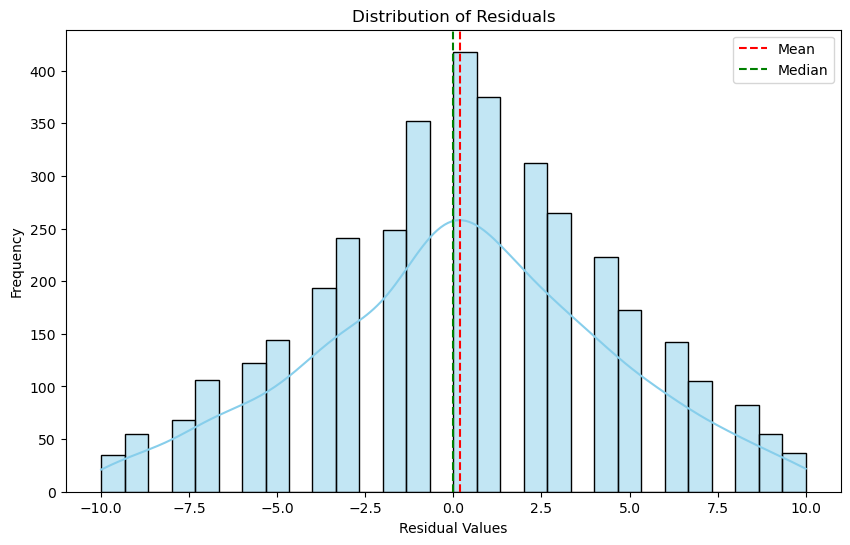

In [149]:
# Plotting the distribution of 'resid'
plt.figure(figsize=(10, 6))
sns.histplot(resid, kde=True, bins=30, color='skyblue')  # Histogram with KDE overlay
plt.title("Distribution of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.axvline(x=np.mean(resid), color='r', linestyle='--', label='Mean')  # Mean line
plt.axvline(x=np.median(resid), color='g', linestyle='--', label='Median')  # Median line
plt.legend()
plt.show()

In [150]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for Seaborn
results_df = pd.DataFrame({
    'True': y_test[:, 1],   # Actual labels
    'Predicted': y_pred[:, 1],     # Predicted labels
    'timestamp' : y_test[:, 0]
})

# # Melt the DataFrame for Seaborn
# melted_results = results_df.melt(var_name='Type', value_name='Class')

# # Create a count plot
# plt.figure(figsize=(10, 6))
# sns.countplot(data=melted_results, x='Class', hue='Type', palette=['blue', 'red'])
# plt.title('Count of True vs Predicted Class Labels')
# plt.xlabel('Class Labels')
# plt.ylabel('Count')
# plt.legend(title='Type')
# plt.show()



In [151]:
results_df['resid'] = resid
results_df.head()

,True,Predicted,timestamp,resid
0,6.0,7.0,1.724267e+09,1.0
1,11.0,7.0,1.724268e+09,-4.0
2,11.0,7.0,1.724269e+09,-4.0
3,4.0,3.0,1.724270e+09,-1.0
4,1.0,11.0,1.724270e+09,10.0


In [152]:
prices = prices[['timestamp', 'close']].set_index('timestamp')
prices.head()

,close
timestamp,
1.710029e+09,68406.99
1.710030e+09,68472.02
1.710031e+09,68443.42
1.710032e+09,68526.71
1.710032e+09,69092.70


In [153]:
import numpy as np
class Portfolio:
     def __init__(self):
        self.values = pd.DataFrame(columns = ['timestamp', 'value'])
        self.values.set_index('timestamp', inplace=True)
        # higher specificity store of value through time (pandas)

        # integer of current value
        self.value =  0

class TradingStrategy:
    def __init__(self, predictions, prices):
        self.predictions = predictions  # 2D array with [timestamp, predicted_category]
        self.prices = prices  # pd dataframe with prices

        self.position = None
        self.trades = pd.DataFrame(columns=['timestamp', 'price', 'action'])
        self.portfolio = Portfolio()



    def execute_trade(self, timestamp, price, action):
        row = pd.DataFrame({'timestamp': [timestamp], 'price': [price], 'action':[action]})
        self.trades = pd.concat([self.trades, row], ignore_index=True)

        if action == 'buy':
            values_row = pd.DataFrame({'timestamp': [timestamp], 'value': [-(price)]})
        elif action == 'sell':
            values_row = pd.DataFrame({'timestamp': [timestamp], 'value': [price]})
        else:
            max_index = self.portfolio.values['value'].idxmax()
            prev_value = self.portfolio.values.loc[max_index, 'value']

            values_row = pd.DataFrame({'timestamp': [timestamp], 'value': [prev_value]})

        values_row.set_index('timestamp', inplace=True)
        self.portfolio.values = pd.concat([self.portfolio.values, values_row], ignore_index=True)



    def monitor(self):
        high = 11
        low = 1

        for _, row in self.predictions.iterrows():
            timestamp = row['timestamp']
            return_category = row['Predicted']
            price = self.prices.loc[timestamp]['close']
            if return_category >= high and self.position != 'buy':
                self.position = 'buy'
                self.execute_trade(timestamp, price, 'buy')

            # Sell if return category is below 3
            elif return_category <= low and self.position != 'sell':
                self.position = 'sell'
                self.execute_trade(timestamp, price, 'sell')

            # hold if mid and on buy position
            elif return_category > low and return_category < high and self.position == 'buy':
                self.execute_trade(timestamp, price, 'hold')

        return self.trades

    
    def getPortfolio(self):
        value = []

        count = 0
        
        for t in self.trades:
            time = t[0]
            price = self.prices.loc[time]['close']
            
            
            if count == 0:
                prev = -(price)
            else:
                prev = value[count - 1][1]

            if t[1] == "buy":
                curr = prev - price
                value.append((time, curr))

            elif t[1] == "sell":
                curr = prev + price 
                value.append((time, curr))

            count+=1
                
        return value

    def get_net_profit(self):
        for i in range(len(self.trades)):
            trade = self.trades.iloc[i]
            price = trade['price']
            if trade['action'] == 'buy':
                self.portfolio.value -= price
            elif trade['action'] == 'sell':
                self.portfolio.value += price
        return self.portfolio.value



strategy = TradingStrategy(results_df[['timestamp', 'Predicted']], prices)
trades = strategy.monitor()
strategy.get_net_profit()
# aggregated_return = trading_strategy.calculate_aggregated_return()

# ts = pd.DataFrame(trades)
# trading_strategy.trades




-3363.5400000000227

In [154]:
strategy.trades

,timestamp,price,action
0,1.724270e+09,61541.78,buy
1,1.724271e+09,61351.01,sell
2,1.724278e+09,61359.40,buy
3,1.724278e+09,61394.33,hold
4,1.724279e+09,61359.40,hold
...,...,...,...
1900,1.727734e+09,63627.12,hold
1901,1.727735e+09,63615.00,sell
1902,1.727737e+09,63561.87,buy
1903,1.727738e+09,63349.16,hold


In [155]:
values = strategy.portfolio.values
buys = strategy.trades[strategy.trades['action'] == 'buy']
sells = strategy.trades[strategy.trades['action'] == 'sell']

In [156]:
strategy_prices = strategy.prices
# Convert the timestamp in strategy_prices to datetime
strategy_prices.reset_index(inplace=True)
strategy_prices['timestamp'] = pd.to_datetime(strategy_prices['timestamp'], unit='s')


In [157]:
# Convert timestamp in buys and sells to datetime
buys['timestamp'] = pd.to_datetime(buys['timestamp'], unit='s')
sells['timestamp'] = pd.to_datetime(sells['timestamp'], unit='s')

# Now merge buys and sells with strategy_prices
df_buys = strategy_prices.merge(buys, how="left", on="timestamp", suffixes=('', '_buy'))
df_final = df_buys.merge(sells, how="left", on="timestamp", suffixes=('', '_sell'))
df_final


,timestamp,close,price,action,price_sell,action_sell
0,2024-03-10 00:00:00,68406.99,NaN,NaN,NaN,NaN
1,2024-03-10 00:15:00,68472.02,NaN,NaN,NaN,NaN
2,2024-03-10 00:30:00,68443.42,NaN,NaN,NaN,NaN
3,2024-03-10 00:45:00,68526.71,NaN,NaN,NaN,NaN
4,2024-03-10 01:00:00,69092.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
18845,2024-09-30 22:45:00,63512.15,NaN,NaN,NaN,NaN
18846,2024-09-30 23:00:00,63561.87,63561.87,buy,NaN,NaN
18847,2024-09-30 23:15:00,63349.16,NaN,NaN,NaN,NaN
18848,2024-09-30 23:30:00,63002.95,NaN,NaN,63002.95,sell


In [158]:
# df_final.action_sell.value_counts()

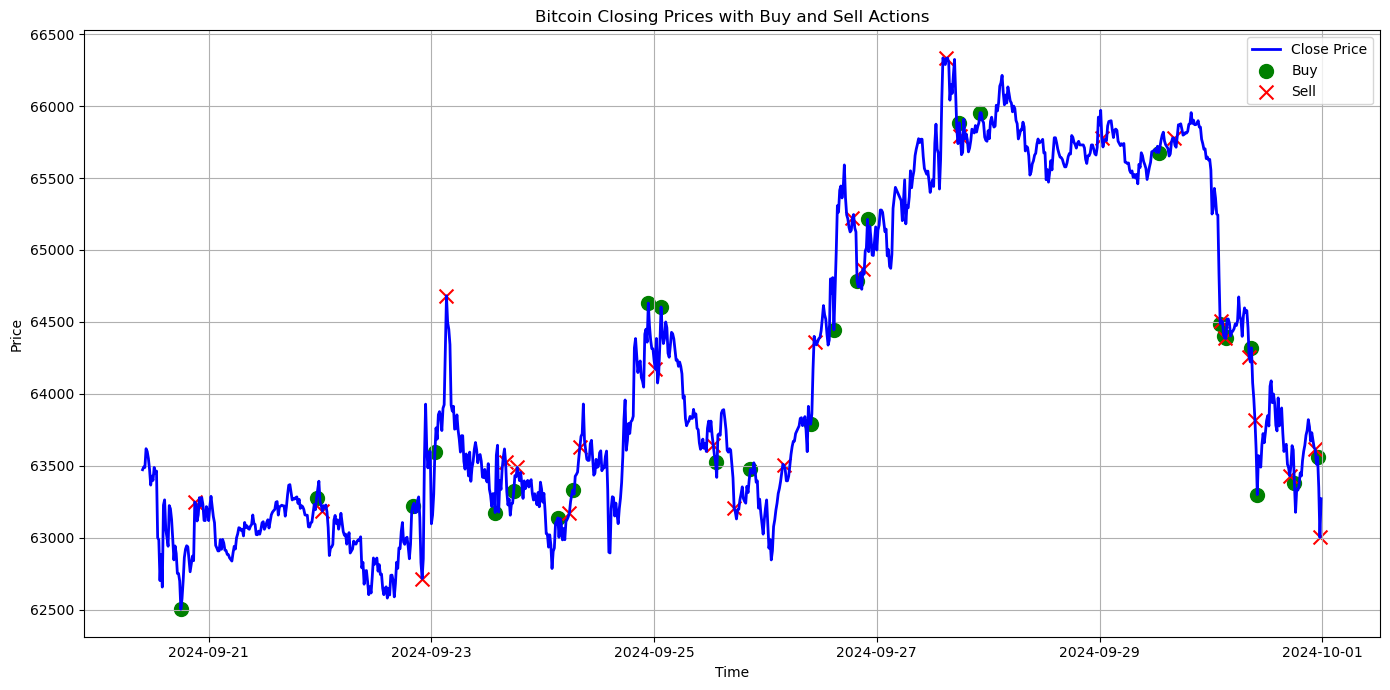

In [159]:

# Ensure that the timestamp is the index for better plotting
try:
    df_final.set_index('timestamp', inplace=True)
except: 
    pass

df_viz = df_final.iloc[-1000:]
# Plotting
plt.figure(figsize=(14, 7))

# Plot closing prices
plt.plot(df_viz.index, df_viz['close'], label='Close Price', color='blue', linewidth=2)

# Marking buys and sells
buys = df_viz[df_final['action'] == 'buy']
sells = df_viz[df_final['action_sell'] == 'sell']

plt.scatter(buys.index, buys['close'], marker='o', color='green', label='Buy', s=100)
plt.scatter(sells.index, sells['close'], marker='x', color='red', label='Sell', s=100)

# Adding titles and labels
plt.title('Bitcoin Closing Prices with Buy and Sell Actions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()